In [13]:
import pandas as pd

import matplotlib
matplotlib.use('Agg') # required to generate images without a window appearing

# does not appear to be necessary
#import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

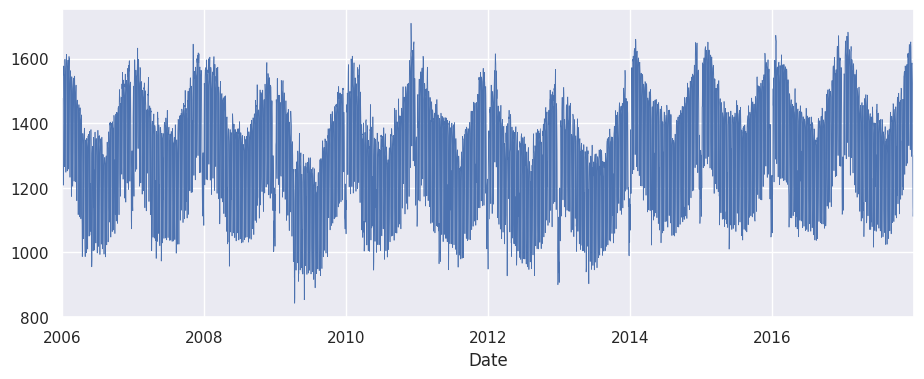

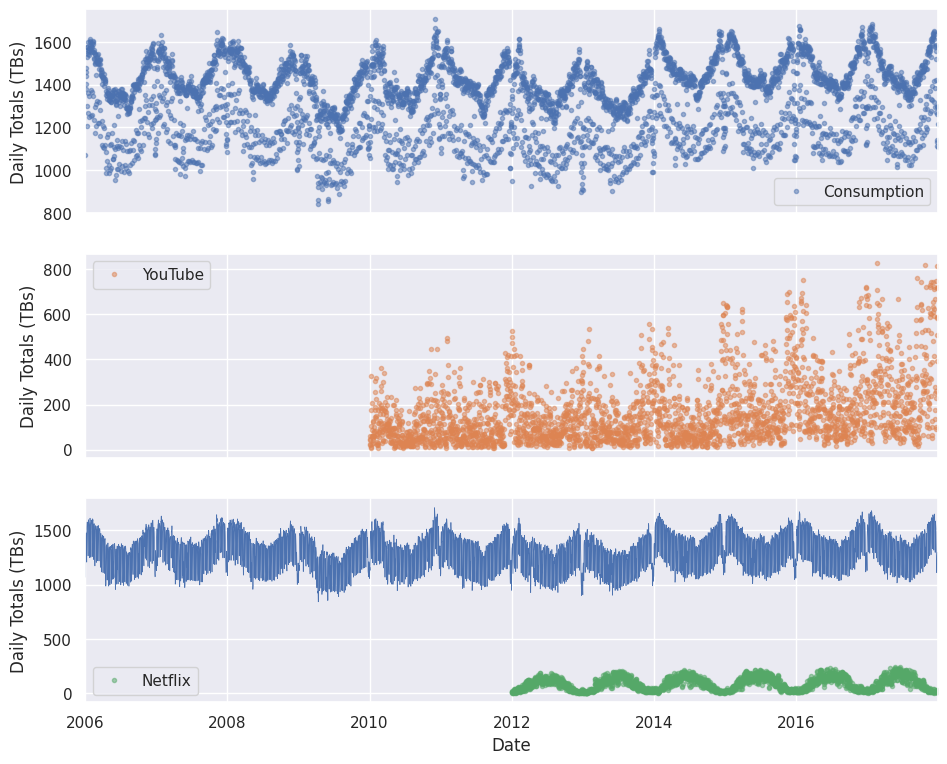

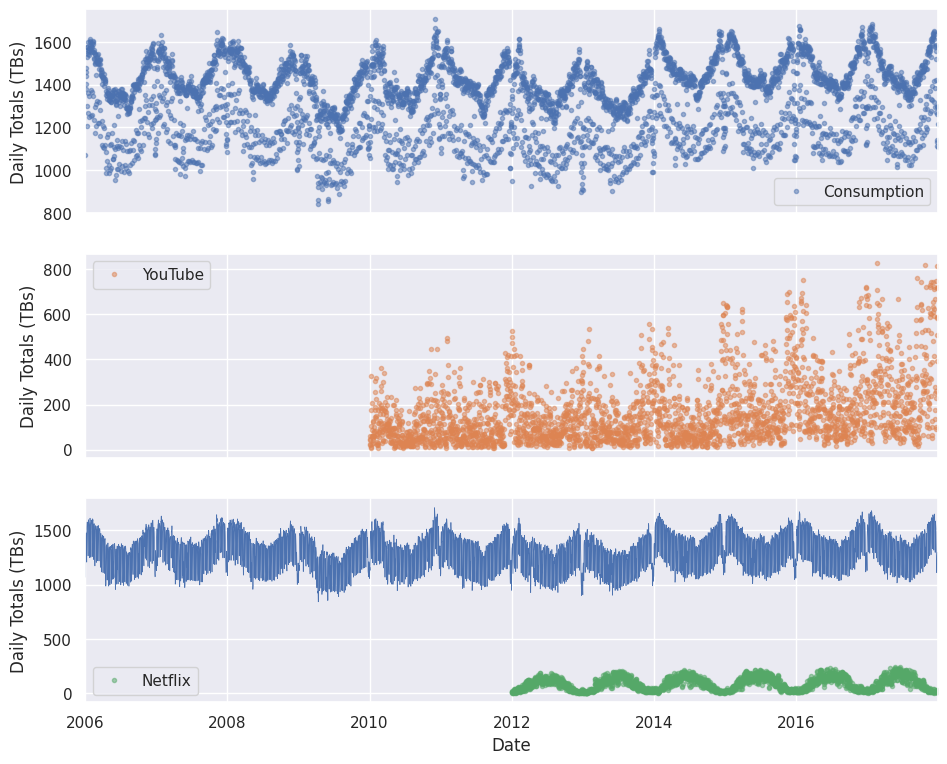

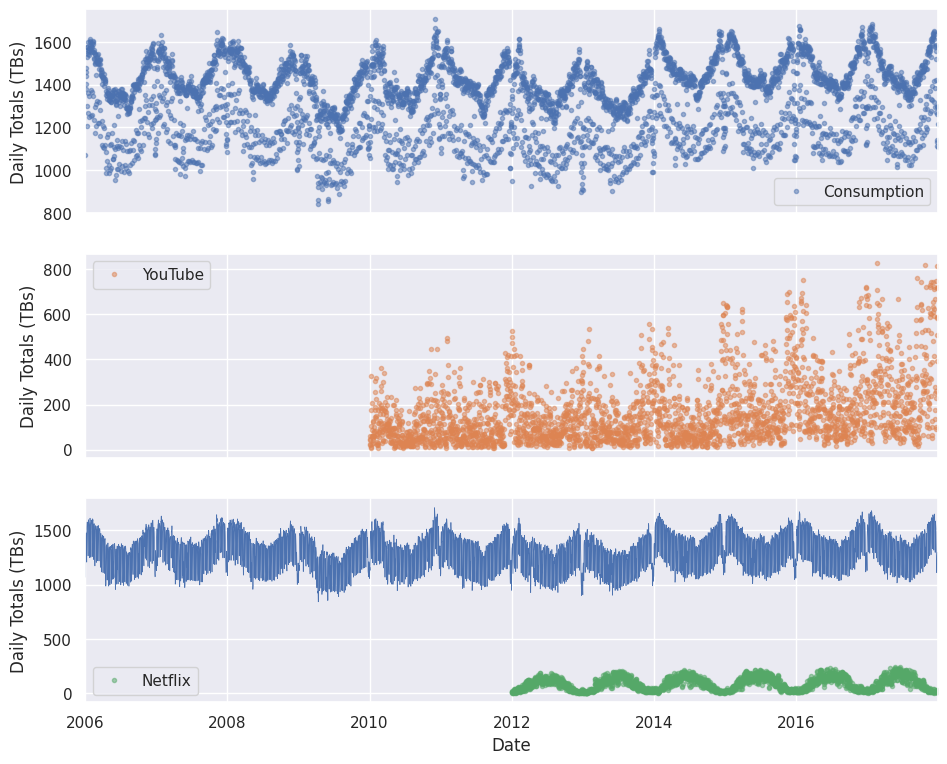

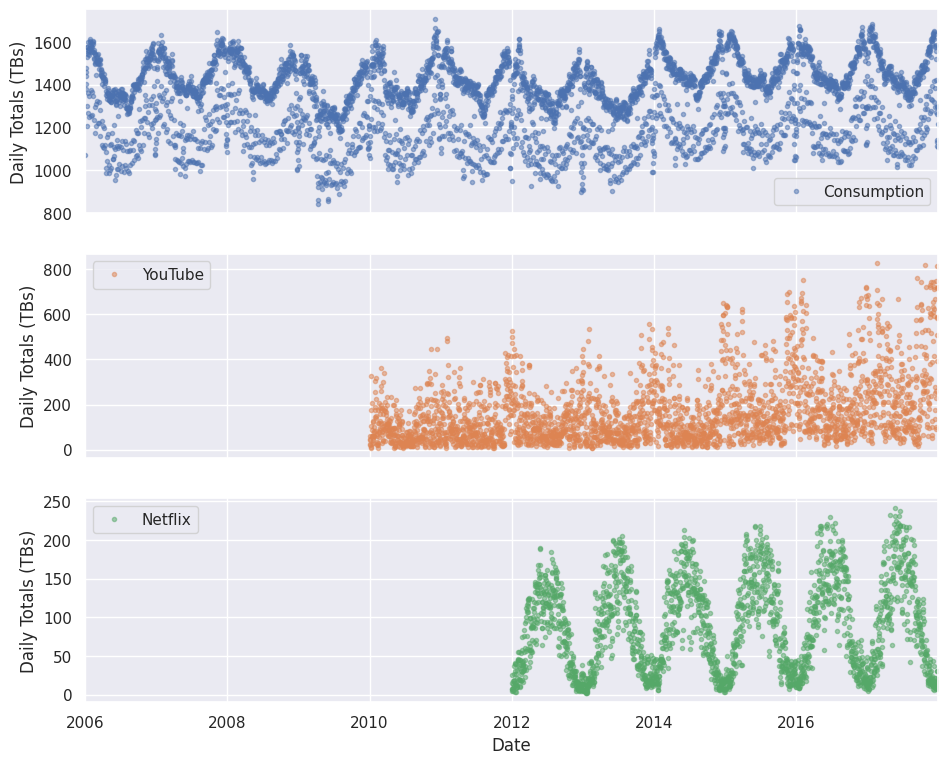

In [14]:
# consolidate the above steps into a single line using the index_col and parse_dates parameters of the read_csv() function
opsd_daily = pd.read_csv('netTraffic.csv', index_col=0, parse_dates=True)

# add some additional columns to our data
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
# required to 'pull' the day name (ex. Monday, Tuesday, happy days...)
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})


### LINE PLOT - create a line plot of the full time series of daily network consumption, using the DataFrame’s plot() method.
netlineplot = opsd_daily['Consumption'].plot(linewidth=0.5)

# save out this figure
fig = netlineplot.get_figure()
fig.savefig("/home/student/static/linePlot.png")



### DOT PLOT - plot the data as dots instead, and also look at the YouTube and Netflix time series
cols_plot = ['Consumption', 'YouTube', 'Netflix']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

for ax in axes:
    ax.set_ylabel('Daily Totals (TBs)')

    # save out this figure
    fig = ax.get_figure()
    fig.savefig(f"/home/student/static/dotPlot.png")